In [15]:
import pandas as pd
from sklearn import cross_validation
from sklearn.svm import SVC as svmc
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [16]:
xl = pd.read_excel("D:\Cancer_Data_set.xlsx")

In [17]:
xl['Level'].head(11)

0        Low
1     Medium
2       High
3       High
4       High
5       High
6        Low
7        Low
8     Medium
9     Medium
10      High
Name: Level, dtype: object

In [18]:
xl["Level"]=xl["Level"].map({"High":1,"Medium":2,"Low":3})
print(xl["Level"][1:10])


1    2
2    1
3    1
4    1
5    1
6    3
7    3
8    2
9    2
Name: Level, dtype: int64


In [19]:
X = xl.iloc[:,1:-1]
y= xl["Level"]
X.head()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Balanced_Diet,Obesity,Smoking,...,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
0,33,1,2,4,5,4,3,2,4,3,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,6,7,2,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,7,7,8,...,9,3,2,4,1,4,2,4,2,3


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [21]:
clf = svmc(C=1.0)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.score(x_train,y_train)

1.0

In [23]:
clf.score(x_test,y_test)

0.998

In [24]:
predictions = clf.predict(x_test)
print (predictions)

[3 2 3 2 3 1 3 2 3 3 1 3 1 3 1 1 1 2 1 1 2 3 2 2 1 1 3 1 3 2 2 3 1 2 3 2 1
 3 3 1 1 1 2 3 1 1 1 1 2 1 3 1 1 2 1 2 1 1 1 1 1 1 3 2 1 3 1 2 3 3 1 2 3 1
 3 1 2 1 2 1 2 2 2 1 2 3 3 1 3 1 2 2 3 2 1 3 2 1 3 2 3 2 3 1 2 2 1 1 2 2 2
 3 1 2 2 3 1 2 3 2 1 1 2 1 2 2 3 3 3 2 1 1 2 3 1 1 2 1 1 2 1 2 1 1 2 2 1 1
 1 1 3 3 2 2 3 3 2 3 2 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 3 2 1 1 1 2 2 2 2 2 2
 3 2 1 2 3 2 1 1 1 1 1 1 3 2 3 1 2 2 1 2 1 3 1 1 2 2 1 3 2 2 2 3 1 3 1 1 3
 2 1 1 2 1 1 2 3 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 3 1 3 1 3 1 2 3 1 2 2 3 3 3
 3 1 1 1 2 3 3 2 3 2 2 1 3 2 1 1 3 2 1 1 1 2 1 3 2 1 1 2 3 1 2 3 1 3 2 3 2
 2 2 2 3 3 3 1 3 3 3 2 3 2 2 1 2 3 3 2 3 2 3 1 3 2 3 2 1 2 3 2 1 2 2 3 1 3
 2 3 2 3 3 3 3 1 3 1 3 2 3 3 1 3 1 1 2 3 2 3 2 3 2 1 2 2 1 2 3 2 3 2 1 1 2
 1 3 3 1 3 2 3 1 3 2 2 1 3 2 3 2 2 1 2 2 3 3 3 1 3 1 3 2 1 3 2 3 2 1 2 1 1
 1 2 1 1 2 1 1 3 3 2 1 1 3 1 3 1 1 3 3 3 1 1 1 2 1 2 2 1 2 3 1 3 1 2 2 3 1
 2 1 1 2 1 2 2 1 3 3 2 2 2 1 3 3 3 3 2 2 1 1 1 2 3 2 1 1 2 1 3 1 1 3 2 1 1
 1 3 3 2 3 1 3 3 1 1 1 1 

In [25]:
accuracy = accuracy_score(predictions,y_test)
print (accuracy)

0.998


In [26]:
xl.loc[(xl['Gender']==1) & (xl['Alcohol_use']>=5) & (xl['Level']==1)].head()

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
2,P100,35,1,4,5,6,5,5,6,7,...,8,7,9,2,1,4,6,7,2,1
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1
4,P101,46,1,6,8,7,7,7,7,7,...,3,2,4,1,4,2,4,2,3,1
5,P102,35,1,4,5,6,5,5,6,7,...,8,7,9,2,1,4,6,7,2,1
10,P107,44,1,6,7,7,7,7,7,7,...,5,3,2,7,8,2,4,5,3,1


In [27]:
result2=xl.loc[ (xl['Gender']==1) & (xl['Alcohol_use']<=5) & (xl['Level']>2) , ['Gender','Alcohol_use', 'Genetic_Risk', 'Obesity', 'Balanced_Diet','Level']]
result2.head()

,Gender,Alcohol_use,Genetic_Risk,Obesity,Balanced_Diet,Level
0,1,4,3,4,2,3
33,1,4,3,4,2,3
38,1,3,7,2,7,3
42,1,2,1,2,3,3
44,1,1,3,2,3,3


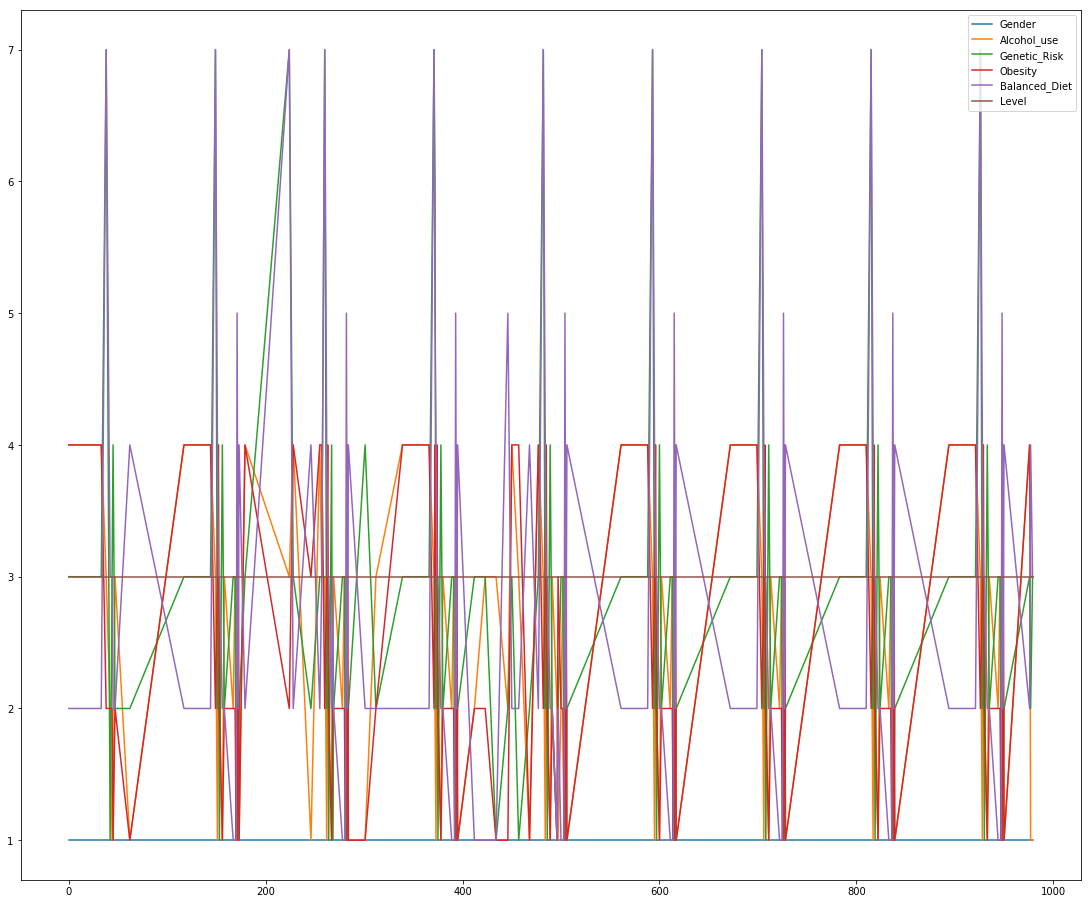

In [28]:
result2.plot(figsize=(19,16),legend=True)

In [29]:
final=result2.head(10)
final

,Gender,Alcohol_use,Genetic_Risk,Obesity,Balanced_Diet,Level
0,1,4,3,4,2,3
33,1,4,3,4,2,3
38,1,3,7,2,7,3
42,1,2,1,2,3,3
44,1,1,3,2,3,3
45,1,1,4,1,2,3
47,1,3,2,2,2,3
62,1,1,2,1,4,3
117,1,4,3,4,2,3
144,1,4,3,4,2,3


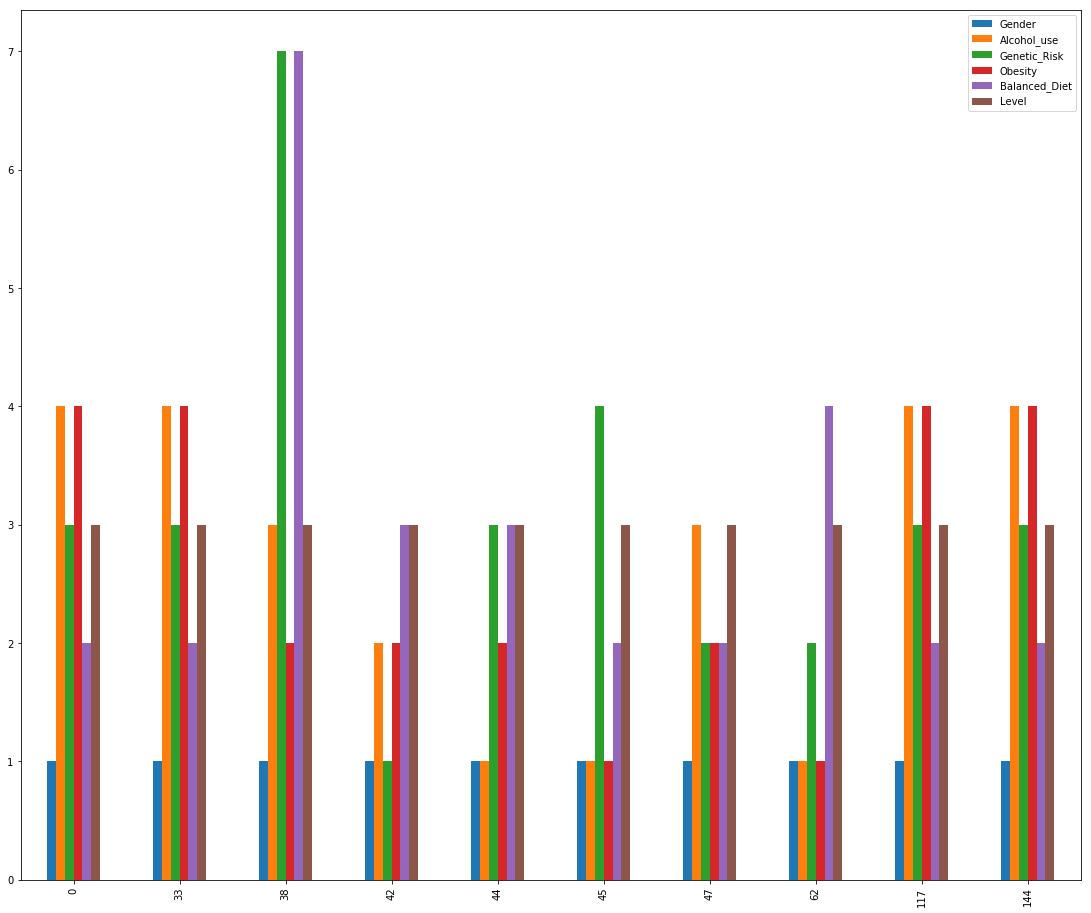

In [30]:
final.plot(kind='bar',figsize=(19,16),legend=True,linewidth=5.0)

In [31]:
result2=xl.loc[ (xl['Gender']==1) & (xl['Genetic_Risk']>=5) & (xl['Level']>2) & (xl['Balanced_Diet']>5) , ['Smoking','Gender','Alcohol_use', 'Genetic_Risk', 'Obesity', 'Balanced_Diet','Level']]
print(result2)
result2.shape

     Smoking  Gender  Alcohol_use  Genetic_Risk  Obesity  Balanced_Diet  Level
37         4       1            7             6        2              7      3
38         4       1            3             7        2              7      3
148        4       1            7             6        2              7      3
149        4       1            3             7        2              7      3
212        4       1            7             6        2              7      3
224        4       1            3             7        2              7      3
259        4       1            7             6        2              7      3
260        4       1            3             7        2              7      3
370        4       1            7             6        2              7      3
371        4       1            3             7        2              7      3
481        4       1            7             6        2              7      3
482        4       1            3             7     

(20, 7)

In [32]:
result2=xl.loc[ (xl['Gender']==1) & (xl['Smoking']>=5) &(xl['Level']==1)  ]
result2.head()

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1
4,P101,46,1,6,8,7,7,7,7,7,...,3,2,4,1,4,2,4,2,3,1
10,P107,44,1,6,7,7,7,7,7,7,...,5,3,2,7,8,2,4,5,3,1
13,P11,34,1,6,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1
17,P113,34,1,6,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,1


     Smoking  Gender  Obesity  Balanced_Diet  Level
37         4       1        2              7      3
38         4       1        2              7      3
148        4       1        2              7      3
149        4       1        2              7      3
212        4       1        2              7      3
224        4       1        2              7      3
259        4       1        2              7      3
260        4       1        2              7      3
370        4       1        2              7      3
371        4       1        2              7      3
481        4       1        2              7      3
482        4       1        2              7      3
592        4       1        2              7      3
593        4       1        2              7      3
703        4       1        2              7      3
704        4       1        2              7      3
814        4       1        2              7      3
815        4       1        2              7      3
925        4

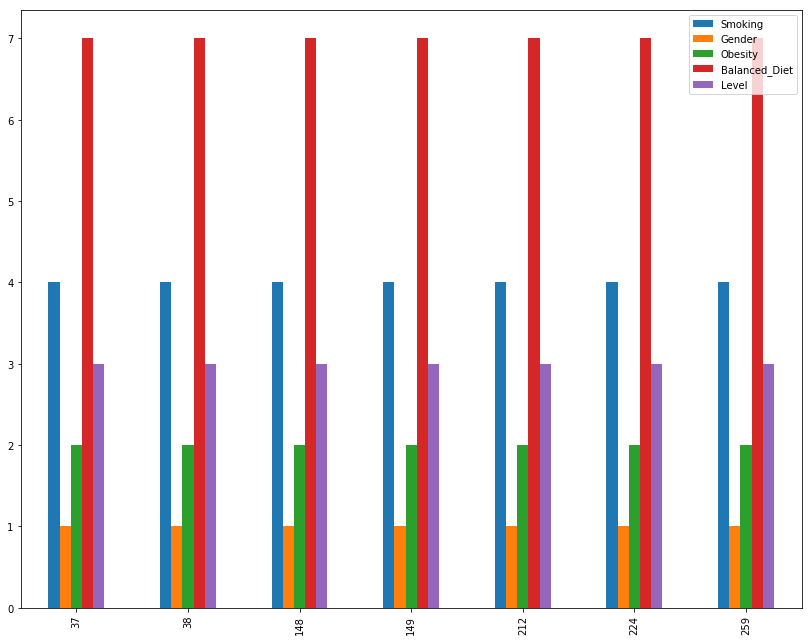

In [33]:
result2=xl.loc[ (xl['Gender']==1) & (xl['Genetic_Risk']>=5) & (xl['Level']>2) & (xl['Balanced_Diet']>5) , ['Smoking','Gender', 'Obesity', 'Balanced_Diet','Level']]
print(result2)
result2.shape
result2.head(7).plot(kind='bar',figsize=(14,11))